In [1]:
import sys
sys.path.append('../')
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from dft_descriptors.prepocessing import preprocess
from classic_descriptors.featurisation import one_hot_encoding
from classic_descriptors.featurisation import process_yield
from rdkit import Chem

In [2]:
df_lit = pd.read_csv("../data_csv/Data_test11262021.csv")
df_lit = preprocess(df_lit)

In [3]:
df_lit["GC/NMR Yield"].unique()

array(['73', '62', '0', '76', '66', '72', '71', '86', '70', '6', '69',
       '83', '92', '93', nan, '78', '77', '82', '87', '98', '79', '94',
       '67', '9', '5', '29', '20', '23', '58', '46', '51', '27', '17',
       '45', '60', '38', '36', '61', '42', '12', '56', '10', '15', '31',
       '1', '18', '28', '21', '55', '4', '33', '25', '54', '48', '44',
       '40', '16', '41', '22', '63', '30', '95', '59', '26', '19', '7',
       '2', '13', '39', '53', '24', '43', '35', '11', '88', '47', '80',
       '99', '96', '68', '37', '75', '32', '100', '64', '8', '89', '85',
       '3', '90', '74', '57', '91', '49', '50', '65', '81', '84', '14'],
      dtype=object)

In [4]:
df_lit["Isolated Yield"].unique()

array([ nan, 92. , 94. , 72. , 95. , 88. , 84. , 90. , 73. , 93. , 91. ,
       35. , 85. , 76. , 89. , 30. , 86. , 51. , 40. , 41. , 60. , 64. ,
       53. , 65. , 61. , 54. ,  0. , 32. , 68. , 67. , 70. , 57. , 66. ,
       87. , 96. , 58. , 81. , 83. , 82. , 79. , 33. , 27. ,  5. , 20. ,
       47. , 38. , 19. , 24. , 80. , 71. , 39. , 50. , 45. , 52. , 46. ,
        4. , 13. , 63. , 18. ,  9. ,  6. , 21. ,  3. , 37. , 75. , 25. ,
       55. , 62. , 78. , 74. , 43. , 31. , 56. , 11. , 34. , 12. ,  1. ,
       77. , 42. , 48. , 49. , 99. , 29. , 69. , 26. ,  2. , 59. , 97. ,
       98. , 16. , 28. , 36. , 22. , 14. , 61.5])

In [5]:
df_hte_bh = pd.read_excel("Dreher_and_Doyle_input_data.xlsx")
df_hte_suz = pd.read_excel("aap9112_Data_File_S1.xlsx")

In [6]:
#preprocess_hte_suz :
name_to_smiles_r = {'6-chloroquinoline' : "C1=CC2=C(C=CC(=C2)Cl)N=C1", 
                    '6-Bromoquinoline' :  "C1=CC2=C(C=CC(=C2)Br)N=C1", 
                    '6-triflatequinoline' : "C1=CC2=C(C=CC(=C2)OS(=O)(=O)C(F)(F)F)N=C1",
                    '6-Iodoquinoline' : "C1=CC2=C(C=CC(=C2)I)N=C1", 
                    '6-quinoline-boronic acid hydrochloride' : "C1=CC2=C(C=CC(=C2)B(O)O)N=C1.Cl",
                    'Potassium quinoline-6-trifluoroborate' : "C1=CC2=C(C=CC(=C2)[B-](F)(F)F)N=C1.[K+]",
                    '6-Quinolineboronic acid pinacol ester' : "C1=CC2=C(C=CC(=C2)B3OC(C)(C)C(C)(C)O3)N=C1"}
df_hte_suz["Reactant_1_smi"] = df_hte_suz["Reactant_1_Name"].map(name_to_smiles_r)

In [7]:
df_hte_suz

,Reaction_No,Reactant_1_Name,Reactant_1_Short_Hand,Reactant_1_eq,Reactant_1_mmol,Reactant_2_Name,Reactant_2_eq,Catalyst_1_Short_Hand,Catalyst_1_eq,Ligand_Short_Hand,Ligand_eq,Reagent_1_Short_Hand,Reagent_1_eq,Solvent_1_Short_Hand,Product_Yield_PCT_Area_UV,Product_Yield_Mass_Ion_Count,Reactant_1_smi
0,1,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(tBu)3,0.125,NaOH,2.5,MeCN,4.764109,6.262059e+03,C1=CC2=C(C=CC(=C2)Cl)N=C1
1,2,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(Ph)3,0.125,NaOH,2.5,MeCN,4.120962,1.324557e+04,C1=CC2=C(C=CC(=C2)Cl)N=C1
2,3,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,AmPhos,0.125,NaOH,2.5,MeCN,2.583837,3.009166e+03,C1=CC2=C(C=CC(=C2)Cl)N=C1
3,4,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(Cy)3,0.125,NaOH,2.5,MeCN,4.443171,3.086070e+04,C1=CC2=C(C=CC(=C2)Cl)N=C1
4,5,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(o-Tol)3,0.125,NaOH,2.5,MeCN,1.949874,2.486306e+03,C1=CC2=C(C=CC(=C2)Cl)N=C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5756,6-Quinolineboronic acid pinacol ester,"1f, 6-BPin-Q",1,0.0004,"2d, Bromide",1,Pd(OAc)2,0.0625,dtbpf,0.125,K3PO4,2.5,DMF,47.211431,1.164924e+07,C1=CC2=C(C=CC(=C2)B3OC(C)(C)C(C)(C)O3)N=C1
5756,5757,6-Quinolineboronic acid pinacol ester,"1f, 6-BPin-Q",1,0.0004,"2d, Bromide",1,Pd(OAc)2,0.0625,XPhos,0.125,K3PO4,2.5,DMF,0.000000,1.473563e+07,C1=CC2=C(C=CC(=C2)B3OC(C)(C)C(C)(C)O3)N=C1
5757,5758,6-Quinolineboronic acid pinacol ester,"1f, 6-BPin-Q",1,0.0004,"2d, Bromide",1,Pd(OAc)2,0.0625,dppf,0.125,K3PO4,2.5,DMF,31.443681,4.665383e+06,C1=CC2=C(C=CC(=C2)B3OC(C)(C)C(C)(C)O3)N=C1
5758,5759,6-Quinolineboronic acid pinacol ester,"1f, 6-BPin-Q",1,0.0004,"2d, Bromide",1,Pd(OAc)2,0.0625,Xantphos,0.125,K3PO4,2.5,DMF,0.000000,1.335187e+06,C1=CC2=C(C=CC(=C2)B3OC(C)(C)C(C)(C)O3)N=C1


# NUMBER OF DIFFERENT PARAMETERS

In [8]:
# number of reactions 
print("HTE Suzuki", len(df_hte_suz))
print("HTE B-H", len(df_hte_bh))
print("Literature Dataset", len(df_lit))

HTE Suzuki 5760
HTE B-H 3955
Literature Dataset 1717


In [9]:
# number of degree of freedom allowed in the chemical space
print("HTE Suzuki", 12)
print("HTE B-H", len(df_hte_bh.columns)-1)
print("Literature Dataset", 13)

HTE Suzuki 12
HTE B-H 4
Literature Dataset 13


In [10]:
# number of differents substrates
print("HTE Suzuki", len(df_hte_suz.Reactant_1_Name.unique()))
print("HTE B-H", len(df_hte_bh["Aryl halide"].unique()))
print("Literature Dataset", len(df_lit["Reactant Smile (C-O)"].unique()))

HTE Suzuki 7
HTE B-H 15
Literature Dataset 339


In [11]:
# number of differents coupling partner
print("HTE Suzuki", len(df_hte_suz.Reactant_1_Name.unique()))
print("HTE B-H", 1)
print("Literature Dataset", len(df_lit["A-X effectif"].unique()))

HTE Suzuki 7
HTE B-H 1
Literature Dataset 223


In [12]:
# number of differents ligands
print("HTE Suzuki", len(df_hte_suz.Ligand_Short_Hand.unique()))
print("HTE B-H", len(df_hte_bh.Ligand.unique()))
print("Literature Dataset", len(df_lit["Ligand effectif"].unique()))

HTE Suzuki 12
HTE B-H 4
Literature Dataset 85


In [13]:
# number of differents precursors
print("HTE Suzuki", len(df_hte_suz.Catalyst_1_Short_Hand.unique()))
print("HTE B-H", 1)
print("Literature Dataset", len(df_lit["Precurseur Nickel"].unique())-1)

HTE Suzuki 1
HTE B-H 1
Literature Dataset 65


In [14]:
# number of differents additives combinations
print("HTE Suzuki", len(df_hte_suz.Reagent_1_Short_Hand.unique()))
print("HTE B-H", len(df_hte_bh.Additive.unique()))
print("Literature Dataset", len(df_lit["Base/additif après correction effective"].unique())-1)

HTE Suzuki 8
HTE B-H 22
Literature Dataset 114


In [15]:
# number of differents Solvents
print("HTE Suzuki", len(df_hte_suz.Solvent_1_Short_Hand.unique()))
print("HTE B-H", 1)
print("Literature Dataset", len(df_lit["Solvent"].unique()))

HTE Suzuki 6
HTE B-H 1
Literature Dataset 31


# ANALYSIS OF THE DIFFERENT PARAMETERS

In [16]:
from rdkit.DataStructs import FingerprintSimilarity
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [17]:
def print_tanimoto_distr(parameter, df):
    L = df.columns.to_list()
    L.remove(parameter)
    df_sub = df.drop(columns=L)
    df_sub = df_sub[df_sub.duplicated(keep = 'first')== False]
    df_sub.reset_index(inplace=True)
    df_sub["mol"]=df_sub[parameter].map(Chem.MolFromSmiles)
    df_sub["MorganFP"]=df_sub["mol"].map(lambda x :AllChem.GetMorganFingerprintAsBitVect(x, 2))

    dists = []
    for i in range(len(df_sub)):
        for j in range(i+1, len(df_sub)):
            dists.append(FingerprintSimilarity(df_sub["MorganFP"][i], df_sub["MorganFP"][j], metric=DataStructs.TanimotoSimilarity))
    
    return dists
#sns.histplot(dists, bins=100, kde=True)

In [18]:
dists_r_lit = print_tanimoto_distr('Reactant Smile (C-O)', df_lit)
dists_r_hte_suz = print_tanimoto_distr("Reactant_1_smi", df_hte_suz)
dists_r_hte_bh = print_tanimoto_distr("Aryl halide", df_hte_bh)

In [19]:
df_hte_suz["Reactant_1_Name"].unique()

array(['6-chloroquinoline', '6-Bromoquinoline', '6-triflatequinoline',
       '6-Iodoquinoline', '6-quinoline-boronic acid hydrochloride',
       'Potassium quinoline-6-trifluoroborate',
       '6-Quinolineboronic acid pinacol ester'], dtype=object)

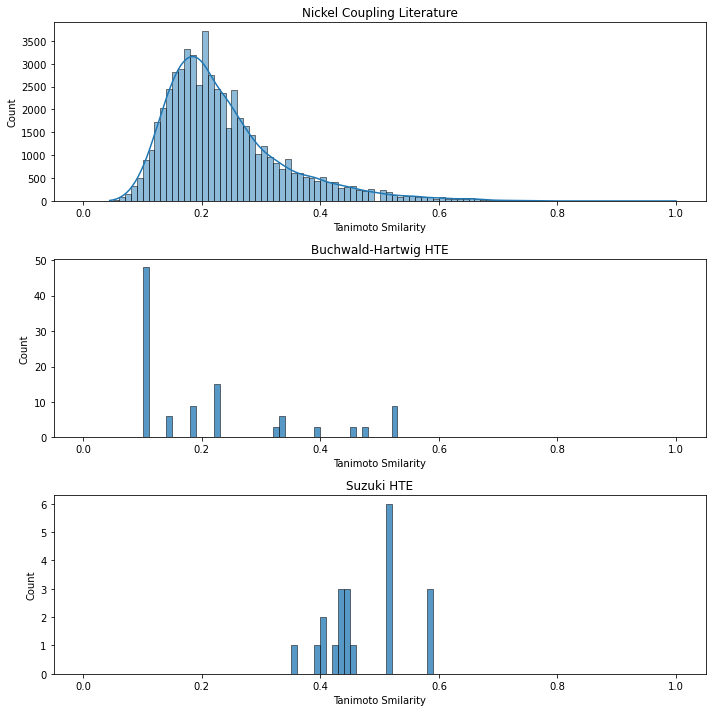

In [20]:
fig, (ax1, ax2, ax3,) = plt.subplots(3,1, figsize=(10, 10))
ax1.set_title("Nickel Coupling Literature")
sns.histplot(dists_r_lit, bins=100, binrange = [0,1], kde=True, ax=ax1)
ax2.set_title("Buchwald-Hartwig HTE")
sns.histplot(dists_r_hte_bh, bins = 100, binrange = [0,1], ax=ax2)
ax3.set_title("Suzuki HTE")
sns.histplot(dists_r_hte_suz, bins=100, binrange = [0,1], ax=ax3)

ax1.set_xlabel("Tanimoto Smilarity")
ax2.set_xlabel("Tanimoto Smilarity")
ax3.set_xlabel("Tanimoto Smilarity")
fig.tight_layout()
fig.savefig('Tanimoto_R2.png', dpi=300)

In [21]:
#dists_r_lit = print_tanimoto_distr('Ligand effectif', df_lit[df_lit["Ligand effectif"] != 'NoLigand'])
#dists_r_hte_suz = print_tanimoto_distr("Reactant_1_smi", df_hte_suz)
#dists_r_hte_bh = print_tanimoto_distr("Aryl halide", df_hte_bh)

# Projection sur Scope et Optimisation d'une publication et de HTE

In [22]:
df_lit.columns
parameters_lit = ['Reactant Smile (C-O)', 'A-X effectif', 'Solvent', 'Precurseur Nickel']

In [23]:
sub_df = df_lit.drop(columns=['Index', 'A-X', 'Time', 'Temperature', 'Unnamed: 7', 'Base/additifs', 
                     'Reductant', 'Ligand', 'Product', 'A-X type', 'Mechanism',
       'type of data (Optimisation or scope)',
       'Notes : qu\'est ce qui ne rentres pas dans le tableau', 'eq CO',
       'eq A-X', 'eq Ni', 'eq Lig (lig + prec)',
       'eq B (si reducteur pas pris en c0mpte)', '2 Steps',
       'Notes bis : modifications', 'Unnamed: 31'])

In [24]:
from sklearn.preprocessing import OrdinalEncoder
def ordinal_encoder(x):
    enc = OrdinalEncoder()
    enc.fit(x)
    return enc.transform(x)

In [25]:
sub_df["sub_ohe"] = list(ordinal_encoder(np.array(sub_df["Reactant Smile (C-O)"]).reshape(-1,1)))
sub_df["ax_ohe"] = list(ordinal_encoder(np.array(sub_df["A-X effectif"]).reshape(-1,1)))
sub_df["prec_ohe"] = list(ordinal_encoder(np.array(sub_df["Precurseur Nickel"]).reshape(-1,1)))
sub_df["base_ohe"] = list(ordinal_encoder(np.array(sub_df["Base/additif après correction effective"]).reshape(-1,1)))
sub_df["lig_ohe"] = list(ordinal_encoder(np.array(sub_df["Ligand effectif"]).reshape(-1,1)))
sub_df["sol_ohe"] = list(ordinal_encoder(np.array(sub_df["Solvent"]).reshape(-1,1)))
sub_df =sub_df.drop(columns=['Reactant Smile (C-O)', 'A-X effectif', 'Solvent', 'Precurseur Nickel',
       'Base/additif après correction effective', 'Ligand effectif'])

X = []
for i, row in sub_df.iterrows():
    X.append(np.concatenate((row['sub_ohe'], row['ax_ohe'], row['prec_ohe'],
                             row['base_ohe'], row['lig_ohe'], row['sol_ohe'] )))
X = np.array(X)

In [26]:
scope = np.array([1 if i < 2 else 0 for i in range(6)])
opt = np.array([0 if i < 2 else 1 for i in range(6)])

In [27]:
sub_df["proj_scope"] = [np.dot(x,scope) for x in X ]
sub_df["proj_optimisation"] = [np.dot(x,opt) for x in X ]
Y = []

sub_df["y_gc"] = [process_yield(y) for y in sub_df["GC/NMR Yield"]]
sub_df["y_iso"] = [process_yield(y) for y in sub_df["Isolated Yield"]]
sub_df["Y"] = [max(sub_df["y_gc"][i], sub_df["y_iso"][i]) for i in range(len(sub_df))]

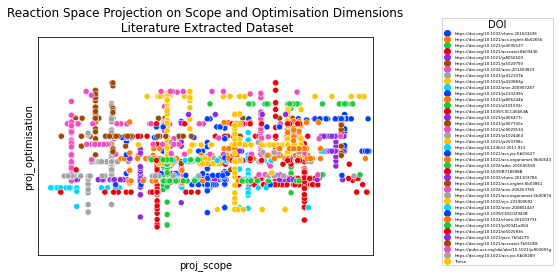

In [28]:
sns.scatterplot(data=sub_df, x='proj_scope', y='proj_optimisation', hue='DOI', palette = 'bright')
plt.title("Reaction Space Projection on Scope and Optimisation Dimensions\n Literature Extracted Dataset")
plt.legend(title="DOI", bbox_to_anchor=(1.2, 1.1), fontsize=4)
plt.xticks([])
plt.yticks([])
plt.xlim(0, 500)
plt.ylim(0, 350)
plt.savefig("alldois_projection_opt_scope_by_doi.png", dpi=300, bbox_inches ='tight')

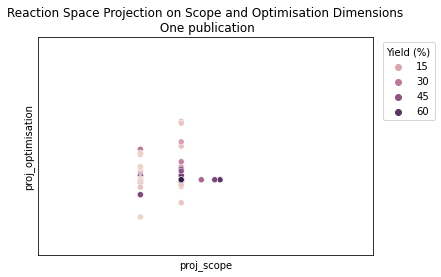

In [29]:
doi_num = 4
dois = sub_df["DOI"].unique()
data_doi = sub_df[sub_df["DOI"] == dois[doi_num]]
sns.scatterplot(data=data_doi, x='proj_scope', y='proj_optimisation', hue='Y')
plt.title("Reaction Space Projection on Scope and Optimisation Dimensions\n One publication")
plt.legend(title="Yield (%)", bbox_to_anchor=(1.2, 1))
plt.xticks([])
plt.yticks([])
plt.xlim(0, 500)
plt.ylim(0, 350)
plt.savefig("doi_4_projection_opt_scope.png", dpi=300, bbox_inches ='tight')

# idem pour HTE

In [30]:
df_hte_suz.columns

Index(['Reaction_No', 'Reactant_1_Name', 'Reactant_1_Short_Hand',
       'Reactant_1_eq', 'Reactant_1_mmol', 'Reactant_2_Name', 'Reactant_2_eq',
       'Catalyst_1_Short_Hand', 'Catalyst_1_eq', 'Ligand_Short_Hand',
       'Ligand_eq', 'Reagent_1_Short_Hand', 'Reagent_1_eq',
       'Solvent_1_Short_Hand', 'Product_Yield_PCT_Area_UV',
       'Product_Yield_Mass_Ion_Count', 'Reactant_1_smi'],
      dtype='object')

In [31]:
sub_df2 = df_hte_suz

In [32]:
sub_df2["sub_ohe"] = list(ordinal_encoder(np.array(df_hte_suz["Reactant_1_Name"]).reshape(-1,1)))
sub_df2["ax_ohe"] = list(ordinal_encoder(np.array(df_hte_suz["Reactant_1_Name"]).reshape(-1,1)))
sub_df2["prec_ohe"] = list(ordinal_encoder(np.array(df_hte_suz["Catalyst_1_Short_Hand"]).reshape(-1,1)))
sub_df2["base_ohe"] = list(ordinal_encoder(np.array(df_hte_suz["Reagent_1_Short_Hand"]).reshape(-1,1)))
sub_df2["lig_ohe"] = list(ordinal_encoder(np.array(df_hte_suz["Ligand_Short_Hand"]).reshape(-1,1)))
sub_df2["sol_ohe"] = list(ordinal_encoder(np.array(df_hte_suz["Solvent_1_Short_Hand"]).reshape(-1,1)))

X = []
for i, row in sub_df2.iterrows():
    X.append(np.concatenate((row['sub_ohe'], row['ax_ohe'], row['prec_ohe'],
                             row['base_ohe'], row['lig_ohe'], row['sol_ohe'] )))
X = np.array(X)

scope = np.array([1 if i < 2 else 0 for i in range(6)])
opt = np.array([0 if i < 2 else 1 for i in range(6)])

sub_df2["proj_scope"] = [np.dot(x,scope) for x in X ]
sub_df2["proj_optimisation"] = [np.dot(x,opt) for x in X ]

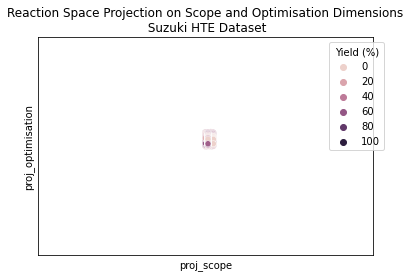

In [33]:
sns.scatterplot(data=sub_df2, x='proj_scope', y='proj_optimisation', hue='Product_Yield_PCT_Area_UV')
plt.legend(title = 'Yield (%)', bbox_to_anchor=(1.05, 1))
plt.xticks([])
plt.yticks([])
plt.title("Reaction Space Projection on Scope and Optimisation Dimensions\n Suzuki HTE Dataset")
plt.xlim(-250, 250)
plt.ylim(-175, 175)
plt.savefig("hte_suz_projection_opt_scope.png", dpi=300, bbox_inches='tight')

In [34]:
sub_df3 = df_hte_bh

In [35]:
sub_df3.columns

Index(['Ligand', 'Additive', 'Base', 'Aryl halide', 'Output'], dtype='object')

In [36]:
sub_df3["sub_ohe"] = list(ordinal_encoder(np.array(df_hte_bh["Aryl halide"]).reshape(-1,1)))
#sub_df["ax_ohe"] = list(ordinal_encoder(np.array(df_hte_bh["Reactant_1_Name"]).reshape(-1,1)))
#sub_df["prec_ohe"] = list(ordinal_encoder(np.array(df_hte_bh["Catalyst_1_Short_Hand"]).reshape(-1,1)))
sub_df3["base_ohe"] = list(ordinal_encoder(np.array(df_hte_bh["Base"]).reshape(-1,1)))
sub_df3["lig_ohe"] = list(ordinal_encoder(np.array(df_hte_bh["Ligand"]).reshape(-1,1)))
sub_df3["sol_ohe"] = list(ordinal_encoder(np.array(df_hte_bh["Additive"]).reshape(-1,1)))

In [37]:
X = []
for i, row in sub_df3.iterrows():
    X.append(np.concatenate((row['sub_ohe'],
                             row['base_ohe'], row['lig_ohe'], row['sol_ohe'] )))
X = np.array(X)

scope = np.array([1 if i < 1 else 0 for i in range(4)])
opt = np.array([0 if i < 1 else 1 for i in range(4)])

sub_df3["proj_scope"] = [np.dot(x,scope) for x in X ]
sub_df3["proj_optimisation"] = [np.dot(x,opt) for x in X ]

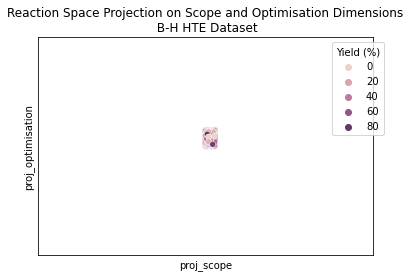

In [38]:
sns.scatterplot(data=sub_df3, x='proj_scope', y='proj_optimisation', hue='Output')
plt.legend(title = 'Yield (%)', bbox_to_anchor=(1.05, 1))
plt.xticks([])
plt.yticks([])
plt.xlim(-250, 250)
plt.ylim(-175, 175)
plt.title("Reaction Space Projection on Scope and Optimisation Dimensions\n B-H HTE Dataset")
plt.savefig("hte_bh_projection_opt_scope.png", dpi=300, bbox_inches='tight')

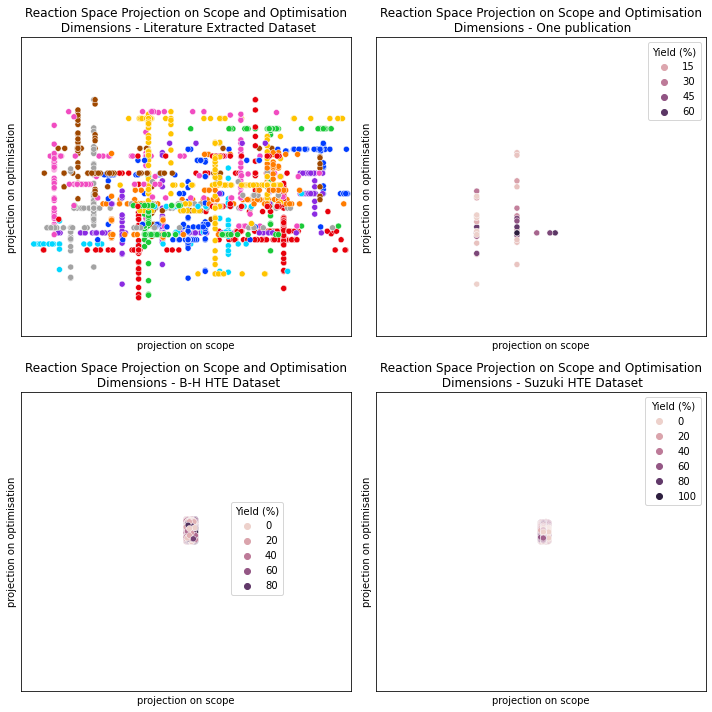

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.set_title("Reaction Space Projection on Scope and Optimisation\n Dimensions - Literature Extracted Dataset")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlim(0, 500)
ax1.set_ylim(0, 350)
ax1.set_xlabel("projection on scope")
ax1.set_ylabel("projection on optimisation")
sns.scatterplot(data=sub_df, x='proj_scope', y='proj_optimisation', hue='DOI', palette = 'bright', ax=ax1)
ax1.get_legend().remove()

ax2.set_title("Reaction Space Projection on Scope and Optimisation\n Dimensions - One publication")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlim(0, 500)
ax2.set_ylim(0, 350)
ax2.set_xlabel("projection on scope")
ax2.set_ylabel("projection on optimisation")
sns.scatterplot(data=data_doi, x='proj_scope', y='proj_optimisation', hue='Y', ax=ax2)
ax2.legend(title="Yield (%)")

ax3.set_title("Reaction Space Projection on Scope and Optimisation\n Dimensions - B-H HTE Dataset")
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim(-250, 250)
ax3.set_ylim(-175, 175)
ax3.set_xlabel("projection on scope")
ax3.set_ylabel("projection on optimisation")
sns.scatterplot(data=sub_df3, x='proj_scope', y='proj_optimisation', hue='Output', ax=ax3)
ax3.legend(title="Yield (%)", bbox_to_anchor=(0.81, 0.65))

ax4.set_title("Reaction Space Projection on Scope and Optimisation\n Dimensions - Suzuki HTE Dataset")
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xlim(-250, 250)
ax4.set_ylim(-175, 175)
ax4.set_xlabel("projection on scope")
ax4.set_ylabel("projection on optimisation")
sns.scatterplot(data=sub_df2, x='proj_scope', y='proj_optimisation', hue='Product_Yield_PCT_Area_UV', ax=ax4)
ax4.legend(title="Yield (%)")


fig.tight_layout()
plt.savefig("projection_opt_scope_alldata.png", dpi=300, bbox_inches='tight')

# Projection sur Scope et Optimisation d'une publication et de HTE
# Avec DFT FEATURISATION

In [215]:
def AL_preprocess(df):
    df["Lewis Acid"] = df["Lewis Acid"].fillna('NoLewisAcid')
    df["Lewis Acid"] = df["Lewis Acid"].replace('nan', 'NoLewisAcid')
    Lewis_Acids_to_drop = ['O=C(O[Cs])O[Cs]', 'Cl[Cs]', 
                       'O=S(=O)(O[Sc](OS(=O)(=O)C(F)(F)F)OS(=O)(=O)C(F)(F)F)C(F)(F)F', 
                       'F[Cs]', 'O=P(O[Na])(O[Na])O[Na]', '[Rb+]',
                       'CC(C)(C)C(=O)O[Cs]', '[Cs+]', 'CC(=O)O[Cu]OC(C)=O', 'F[Sr]F']
    for al in Lewis_Acids_to_drop:
        df = df[df["Lewis Acid"] != al]
    
    return df.reset_index(drop=True)

In [216]:
from dft_descriptors.featurisation import process_dataframe_dft
df = pd.read_csv("../data_csv/Data_test11262021.csv")
df_lit = preprocess(df)
df_lit = AL_preprocess(df_lit)

In [217]:
X, y, DOIs, Mecas, Origin, (v_scope, v_optim) = process_dataframe_dft(df_lit, dim=True)
scope = np.array(v_scope)
optim = np.array(v_optim)

NoLigand


In [218]:
df_lit["proj_scope"] = [np.dot(x, scope) for x in X ]
df_lit["proj_optimisation"] = [np.dot(x, optim) for x in X ]
df_lit["yield"] = y

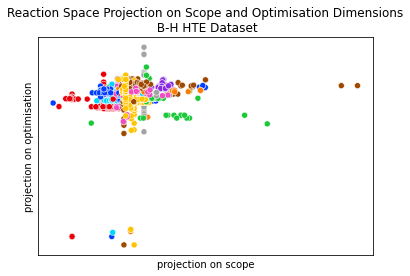

In [219]:
sns.scatterplot(data=df_lit, x='proj_scope', y='proj_optimisation', hue='DOI', palette = 'bright')
plt.legend(title = 'Yield (%)', bbox_to_anchor=(1.05, 1))
plt.xticks([])
plt.yticks([])
plt.title("Reaction Space Projection on Scope and Optimisation Dimensions\n B-H HTE Dataset")
plt.xlabel("projection on scope")
plt.ylabel("projection on optimisation")
plt.legend().remove()
#plt.savefig("hte_bh_projection_opt_scope.png", dpi=300, bbox_inches='tight')

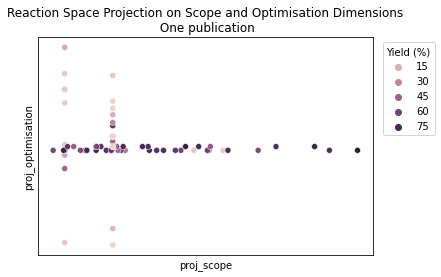

In [220]:
doi_num = 4
dois = df_lit["DOI"].unique()
data_doi = df_lit[df_lit["DOI"] == dois[doi_num]]
sns.scatterplot(data=data_doi, x='proj_scope', y='proj_optimisation', hue='yield')
plt.title("Reaction Space Projection on Scope and Optimisation Dimensions\n One publication")
plt.legend(title="Yield (%)", bbox_to_anchor=(1.2, 1))
plt.xticks([])
plt.yticks([])
plt.savefig("doi_4_projection_opt_scope.png", dpi=300, bbox_inches ='tight')

In [221]:
len(optim)

297

# Projection sur PCA1 espace scope et PCA1 escpace optimisation

In [222]:
from sklearn.decomposition import PCA

In [223]:
df = pd.read_csv("../data_csv/Data_test11262021.csv")
df_lit = preprocess(df)
df_lit = AL_preprocess(df_lit)
X, y, DOIs, Mecas, Origin, (v_scope, v_optim) = process_dataframe_dft(df_lit, dim=True)

NoLigand


In [224]:
X_sco = X[:, :np.sum(v_scope)]
X_opt = X[:, np.sum(v_scope):]

In [225]:
pca = PCA(n_components=1)
pca.fit(X_sco)
X_sco_pc1 = pca.transform(X_sco)
sco_pc1 = np.array([i[0] for i in X_sco_pc1])

pca = PCA(n_components=1)
pca.fit(X_opt)
X_opt_pc1 = pca.transform(X_opt)
opt_pc1 = np.array([i[0] for i in X_opt_pc1])

In [226]:
data = pd.DataFrame(data=opt_pc1.reshape(-1,1), columns=["opt"])
data["sco"] = sco_pc1.reshape(-1,1)
data["DOI"] = DOIs
data["yield"] = y
data["data type"] = Origin

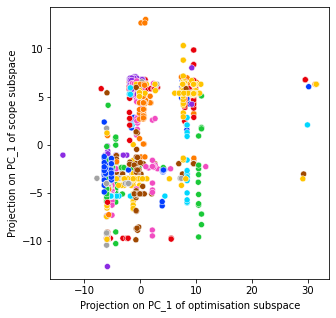

In [227]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='opt', y='sco', hue='DOI', data=data, 
                palette='bright', legend=False)

plt.xlabel("Projection on PC_1 of optimisation subspace")
plt.ylabel("Projection on PC_1 of scope subspace")
plt.savefig('dataset_pc_opt_sco.svg', dpi=300, format='svg',
        bbox_inches='tight' )
plt.show()


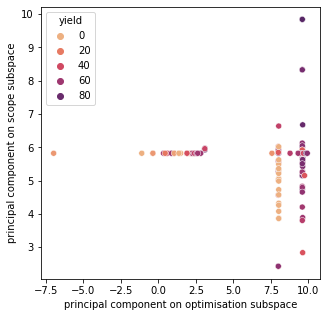

In [228]:
i = 17
data2 = data[data["DOI"] == np.unique(DOIs)[i]]

plt.figure(figsize=(5, 5))
sns.scatterplot(x='opt', y='sco', hue='yield', data=data2, 
                palette='flare')

plt.xlabel("principal component on optimisation subspace")
plt.ylabel("principal component on scope subspace")
plt.show()

https://doi.org/10.1021/acscatal.8b03436


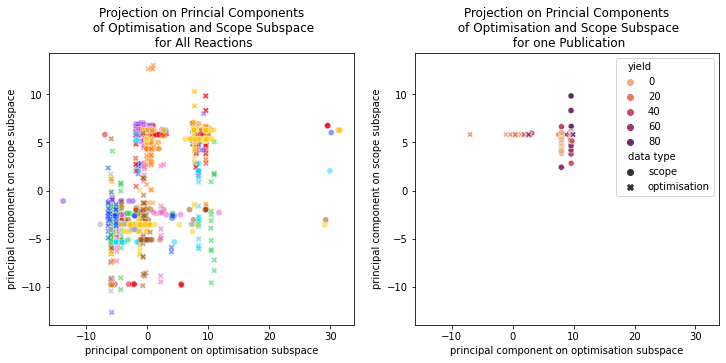

In [240]:
#plt.figure()
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.scatterplot(x='opt', y='sco', hue='DOI', data=data, legend=False,
                palette='bright', ax=ax[0], style="data type", alpha=0.5)
sns.scatterplot(x='opt', y='sco', hue='yield', data=data2, 
                palette='flare', ax=ax[1], style="data type")

ax[0].set_title("Projection on Princial Components\n of Optimisation and Scope Subspace\n for All Reactions")
ax[0].set_xlabel("principal component on optimisation subspace")
ax[0].set_ylabel("principal component on scope subspace")

ax[1].set_title("Projection on Princial Components\n of Optimisation and Scope Subspace\n for one Publication")
ax[1].set_xlabel("principal component on optimisation subspace")
ax[1].set_ylabel("principal component on scope subspace")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())

plt.savefig('pca_dft_global.svg', dpi=300, format='svg',
        bbox_inches='tight' )

print(np.unique(DOIs)[i])

# Meme chose avec featurisation par fingerprints